Dataset

In [1]:
from LetterNeuralNet import *
train_loader, test_loader = dataloaderSetup()

Example for image and label size

In [2]:
image, label = next(iter(train_loader))
print(f"batch shape of letters: {image.size()}")
print(f"batch shape of labels: {label.size()}")

batch shape of letters: torch.Size([26, 1, 28, 28])
batch shape of labels: torch.Size([26])


Examples for 4 batches from the training datasetloader



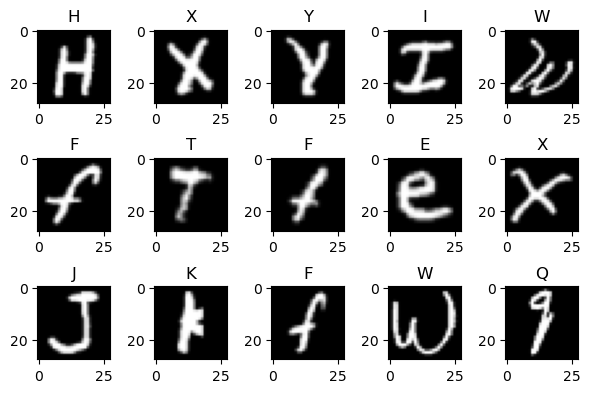

In [3]:
columns = 5
rows = 3
fig, ax = plt.subplots(rows, columns, dpi=100)
ax = ax.ravel()
for i, (image, labels) in enumerate(train_loader):
    if(i == rows):
        break
    for j, (img) in enumerate(image):
        if(i*columns+j>=columns*rows):
            break
        np_array = img.numpy()
        np_array = np_array.swapaxes(0, 2)
        ax[i*columns+j].imshow(np_array, cmap="gray")
        ax[i*columns+j].set_title(all_classes[labels[j]-1]) # set title
fig.tight_layout()
plt.show()

Confusion matrix examples from training

In [4]:
device = "dml"
model = ConvNet().to(device)
print(model)

ConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=26, bias=True)
)


Epoch [1/1], Step [480/4800], Accuracy: 0.5358, Loss: 0.6873                                                  

Epoch [1/1], Step [960/4800], Accuracy: 0.7764, Loss: 0.9053                                                  

Epoch [1/1], Step [1440/4800], Accuracy: 0.8300, Loss: 0.2920                                                  

Epoch [1/1], Step [1920/4800], Accuracy: 0.8529, Loss: 0.2299                                                  

Epoch [1/1], Step [2400/4800], Accuracy: 0.8696, Loss: 0.4111                                                  

Epoch [1/1], Step [2880/4800], Accuracy: 0.8808, Loss: 0.3197                                                  

Epoch [1/1], Step [3360/4800], Accuracy: 0.8842, Loss: 0.2281                                                  

Epoch [1/1], Step [3840/4800], Accuracy: 0.8947, Loss: 0.0974                                                  

Epoch [1/1], Step [4320/4800], Accuracy: 0.8954, Loss: 0.0956                                     

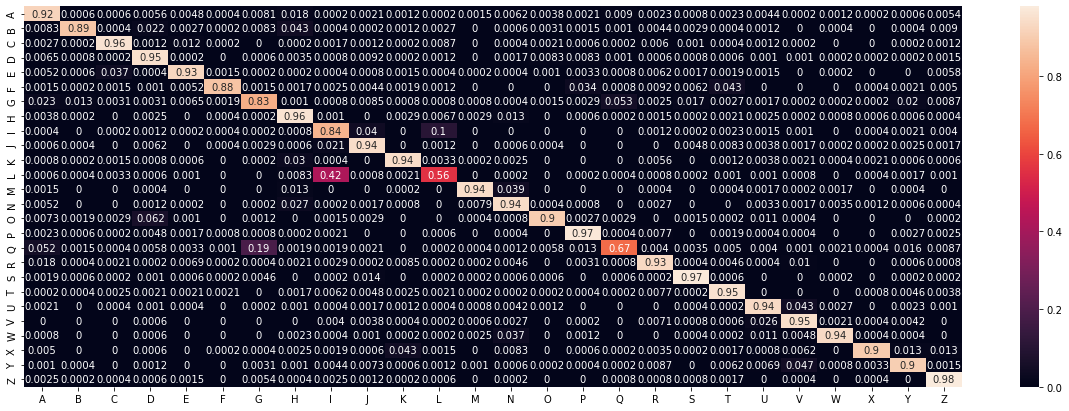

In [5]:
num_epochs = 1

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
model = trainingPhase(model, criterion, optimizer, train_loader, num_epochs, 0.1, 0, device, confusionmatrixdevice, writer, FILE, all_classes, 1)


Confusion matrix examples from testing



Starting with Testing!

Creating Confusion Matrix ...
[████████████████████████████████████████████████████████████] 99.9% ...remaining Time: 0.0s


###########################Examples for wrong predictions##################################

predicted: tensor([ 0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 20,  0,  0,  0,  0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Wrong

predicted: tensor([ 0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 20,  0,  0,  0,  0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Wrong

predicted: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        20,  0,  0,  0,  0,  0,  0,  0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Wrong

predicted: tensor([0, 0, 0, 0,

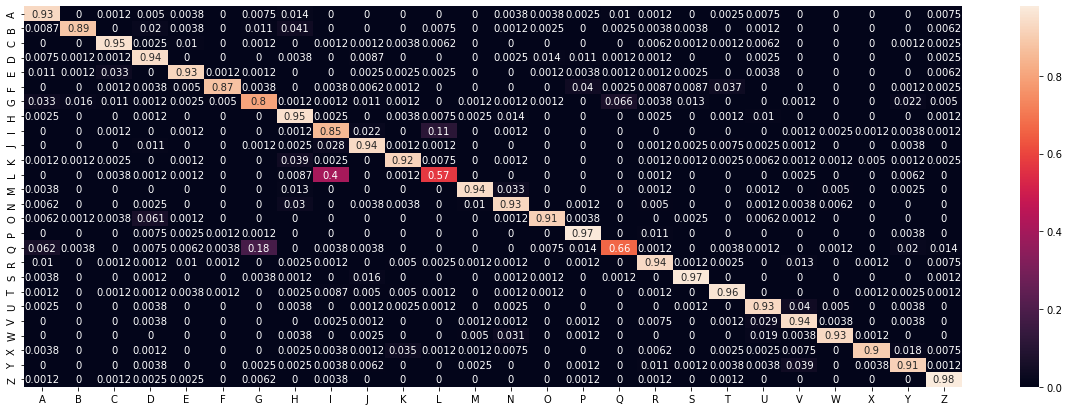

In [6]:
testingPhase(model, test_loader, writer, FILE, all_classes, 1, confusionmatrixdevice)